# Importo librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import skew
import re
import requests
from bs4 import BeautifulSoup

# Primer vistazo

In [2]:
titanic=pd.read_csv(r"E:\COPIA_DAWN\DAWN\CURSOSYLIBROS\Data\Upgrade Hub Data Analytics Bootcamp\Tareas\Module1_0_SoftSkillsProyecto\datos\titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Busco valores duplicados

In [6]:
duplicates=titanic.duplicated()
num_duplicates=duplicates.sum()
if duplicates.any():
    print("Se han encontrado duplicados en el DataFrame.")
    print('Hay un total de', num_duplicates, 'valores duplicados en el DataFrame.')
else:
    print("No hay duplicados en el DataFrame.")

No hay duplicados en el DataFrame.


# Busco valores nulos

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
for columna in titanic.columns:
    pct_null=(titanic[columna].isnull().sum()*100)/titanic.shape[0]
    print(f'El porcentaje de valores nulos en {columna} es del {round(pct_null,2)}%')

El porcentaje de valores nulos en PassengerId es del 0.0%
El porcentaje de valores nulos en Survived es del 0.0%
El porcentaje de valores nulos en Pclass es del 0.0%
El porcentaje de valores nulos en Name es del 0.0%
El porcentaje de valores nulos en Sex es del 0.0%
El porcentaje de valores nulos en Age es del 19.87%
El porcentaje de valores nulos en SibSp es del 0.0%
El porcentaje de valores nulos en Parch es del 0.0%
El porcentaje de valores nulos en Ticket es del 0.0%
El porcentaje de valores nulos en Fare es del 0.0%
El porcentaje de valores nulos en Cabin es del 77.1%
El porcentaje de valores nulos en Embarked es del 0.22%


### Relleno valores nulos en Cabina a partir de la moda

In [9]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
titanic[(titanic['Pclass']==1)&(titanic['Cabin'].isnull())].shape

(40, 12)

In [11]:
titanic['Level']=titanic['Cabin'].str.replace('[0-9]','',regex=True)

In [12]:
titanic['Level'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'C C C', 'B', 'F', 'F G', 'D D',
       'B B', 'F E', 'C C', 'B B B B', 'T', 'B B B'], dtype=object)

In [13]:
moda_cabin = titanic['Level'].mode().values[0]
moda_cabin

'C'

In [14]:
titanic.loc[(titanic['Pclass']==1) & (titanic['Cabin'].isnull()),'Cabin']=moda_cabin
titanic.loc[(titanic['Pclass']==1) & (titanic['Cabin']=='C'),'Level']=moda_cabin
titanic.loc[(titanic['Pclass']==2) & (titanic['Cabin'].isnull()),'Cabin']='E'
titanic.loc[(titanic['Pclass']==2) & (titanic['Level'].isnull()),'Level']='E'
titanic.loc[(titanic['Pclass']==3) & (titanic['Cabin'].isnull()),'Cabin']='G'
titanic.loc[(titanic['Pclass']==3) & (titanic['Level'].isnull()),'Level']='G'

### Relleno valores nulos en Embarcación a partir de la moda

In [15]:
moda = titanic['Embarked'].mode().values[0]
titanic['Embarked'].fillna(moda, inplace=True)

In [16]:
moda

'S'

### Predicción de la Edad a partir de la media y algoritmo KNN

In [17]:
fig=px.histogram(x=titanic['Age'])
fig.update_layout(height=500, width=500, title_text="Distribución de la Edad", 
                  xaxis=dict(title="Edad"), yaxis=dict(title="Número de pasajeros"), template='plotly_dark')
fig.show()

In [18]:
print(f"Valor del coeficiente de Fisher-Pearson sobre la distribución de la columna 'Age': {skew(titanic['Age'],nan_policy='omit')}")

Valor del coeficiente de Fisher-Pearson sobre la distribución de la columna 'Age': 0.3882898514698657


In [19]:
#Normalización de Fare
scaler = StandardScaler()
titanic['Fare_Normalizado'] = scaler.fit_transform(titanic[['Fare']])

In [20]:
# estas son las columnas que quieres como predictores para tu modelo
columnas=['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare_Normalizado', 'Embarked',"Age"]
# Aplicamos OneHotEncoder para codificar nuestras variables categóricas 
encoder = OneHotEncoder(drop='first', sparse_output=False)
titanic_encoded = pd.DataFrame(encoder.fit_transform(titanic[columnas]))
titanic_encoded.columns = encoder.get_feature_names_out(columnas)

In [21]:
# Creamos dos dataframes basados en la presencia de Age
titanic_encoded['Age'] = titanic['Age']
titanic_with_age = titanic_encoded.dropna(subset=['Age']) 
titanic_without_age = titanic_encoded[titanic_encoded['Age'].isna()].drop(columns='Age')

In [22]:
# Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(titanic_with_age.drop(columns='Age'), titanic_with_age['Age'], test_size=0.2, random_state=357)

scores = [219.08405565 122.88157895 223.62027544 135.65153772 167.68399386]
scores = [136.52994217  82.51329496 155.68756535 103.88859298 123.60082807]
scores = [130.4628458   60.18006121 135.29710351 108.54934006 116.9991268 ]
scores = [117.66245815  67.15095137 127.40913542 110.76911469 131.51371228]
scores = [125.76203809  68.63970772 127.13609105 125.31205674 134.64002067]
scores = [127.75953862  76.2862182  126.69929578 128.28372641 138.96856813]


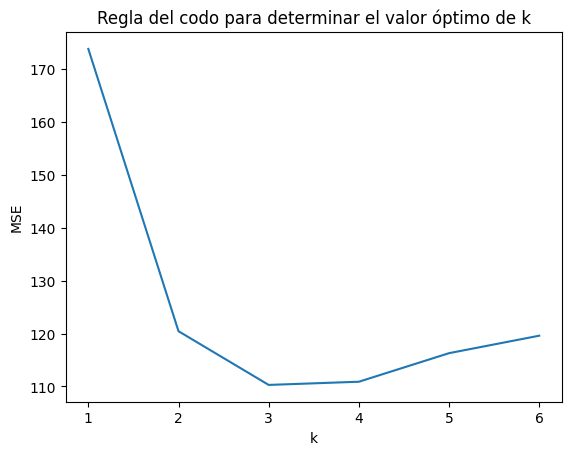

In [23]:
# Lista para almacenar los valores de MSE (Error Cuadrático Medio)
mse = []

# Rango de k para probar
k_range = range(1, 7)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)

    # Realizamos la validación cruzada para obtener una medida más robusta del error
    """  estamos tomando el negativo de los valores devueltos para obtener el MSE real. 
         Luego, añadimos la media de estos valores a nuestra lista de MSE para cada valor de k (mse.append(scores.mean())).
    """
    scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(scores.mean())
    print(f'scores = {scores}')
    
 
# Graficamos los valores 
plt.plot(k_range, mse)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Regla del codo para determinar el valor óptimo de k')
plt.show()

In [24]:
# Determinar el mejor valor de k
best_k = k_range[mse.index(min(mse))]
print(f'Mejor número K: {best_k}')

Mejor número K: 3


In [25]:
# Creamos el modelo KNN con el mejor valor de k
knn = KNeighborsRegressor(n_neighbors=best_k)

# Ajustamos el modelo a los datos sin valores nulos
knn.fit(X_train, y_train)

# Imputamos los valores faltantes en la columna 'Age'
imputed_ages = knn.predict(titanic_without_age)
titanic.loc[titanic['Age'].isna(), 'Age'] = imputed_ages

### Comprobación de resultados

In [26]:
titanic.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin               0
Embarked            0
Level               0
Fare_Normalizado    0
dtype: int64

# Limpieza de columnas

### Observación preliminar de los datos

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Level,Fare_Normalizado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,G,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,G,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,G,-0.486337


In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             891 non-null    object 
 11  Embarked          891 non-null    object 
 12  Level             891 non-null    object 
 13  Fare_Normalizado  891 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


### Convierto la columna `Age` en tipo de dato integer

In [29]:
titanic['Age']=titanic['Age'].astype(int)

### Mayúsculas dentro de la columna `Sex`

In [30]:
titanic['Sex']=titanic['Sex'].str.title()

### Separación de los nombres de casados y los nombres de solteras

In [31]:
titanic['MarriedName']=titanic['Name'].str.split('[(]',regex=True).str[0]
titanic['FemaleName']=titanic['Name'].str.split('[,|(|)]',regex=True).str[2]
titanic['FullName']=titanic['FemaleName'].combine_first(titanic['MarriedName'])
titanic.drop(columns=['FemaleName','Name'],inplace=True)

In [32]:
titanic['Level']=titanic['Level'].str.split(' ').str[0]

### Se ordenan las columnas

In [33]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Level', 'Fare_Normalizado',
       'MarriedName', 'FullName'],
      dtype='object')

In [34]:
titanic=titanic[['PassengerId', 'Survived', 'Pclass', 'MarriedName', 'FullName', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin','Level', 'Embarked']]
titanic.head()

,PassengerId,Survived,Pclass,MarriedName,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Level,Embarked
0,1,0,3,"Braund, Mr. Owen Harris","Braund, Mr. Owen Harris",Male,22,1,0,A/5 21171,7.2500,G,G,S
1,2,1,1,"Cumings, Mrs. John Bradley",Florence Briggs Thayer,Female,38,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina","Heikkinen, Miss. Laina",Female,26,0,0,STON/O2. 3101282,7.9250,G,G,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath",Lily May Peel,Female,35,1,0,113803,53.1000,C123,C,S
4,5,0,3,"Allen, Mr. William Henry","Allen, Mr. William Henry",Male,35,0,0,373450,8.0500,G,G,S


# Observaciones en los datos

### Observaciones preliminares de los datos numéricos

In [35]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,29.575758,13.609796,0.0,21.0000,28.0000,37.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


### Distribución de la edad dentro del barco

In [36]:
fig=px.histogram(x=titanic['Age'])
fig.update_layout(height=500, width=500, title_text="Distribución de la Edad", 
                  xaxis=dict(title="Edad"), yaxis=dict(title="Número de pasajeros"), template='plotly_dark')
fig.show()

In [37]:
edad_clases=titanic.groupby('Pclass')['Age'].value_counts().reset_index()
edad_clases.columns=['Pclass','Age', 'count']
fig = px.strip(edad_clases, x="Age", y="count", template="plotly_dark", color='Pclass')

fig.update_layout(
    title='Distribución de edades por clase',
    xaxis=dict(title='Edad'),
    yaxis=dict(title='Número de pasajeros')
)

fig.show()

### Distribución del precio del billete

In [38]:
fig=px.histogram(x=titanic['Fare'])
fig.update_layout(height=500, width=500, title_text="Distribución del precio del billete", 
                  xaxis=dict(title="Precio"), yaxis=dict(title="Número de pasajeros que han pagado"), template='plotly_dark')
fig.show()

### Porcentaje de pasajeros según la clase

In [39]:
pct_pasajeros_1 = (len(titanic[titanic['Pclass']==1])*100)/titanic.shape[0]
pct_pasajeros_2 = (len(titanic[titanic['Pclass']==2])*100)/titanic.shape[0]
pct_pasajeros_3 = (len(titanic[titanic['Pclass']==3])*100)/titanic.shape[0]

fig = px.pie(labels=['Primera Clase','Segunda Clase', 'Tercera Clase'], 
             values=[pct_pasajeros_1,pct_pasajeros_2,pct_pasajeros_3],
             names=['Primera Clase','Segunda Clase', 'Tercera Clase'],
             color=['Primera Clase','Segunda Clase', 'Tercera Clase'],
             template='plotly_dark')

fig.update_layout(
    title='Porcentaje de pasajeros dentro de cada clase')

fig.show()

### Distribución por precio del billete, clase y nivel del barco

In [40]:
rango_precios=pd.cut(titanic['Fare'], 10)
distribucion=titanic.groupby(rango_precios)[['Pclass','Level']].value_counts().reset_index()
distribucion[distribucion['count']>0].reset_index()

,index,Fare,Pclass,Level,count
0,0,"(-0.512, 51.233]",3,G,469
1,1,"(-0.512, 51.233]",2,E,165
2,2,"(-0.512, 51.233]",1,C,38
3,3,"(-0.512, 51.233]",1,A,12
4,4,"(-0.512, 51.233]",1,B,10
5,5,"(-0.512, 51.233]",1,E,9
6,6,"(-0.512, 51.233]",1,D,8
7,7,"(-0.512, 51.233]",2,F,8
8,8,"(-0.512, 51.233]",3,F,5
9,9,"(-0.512, 51.233]",2,D,4


In [41]:
enlace = "https://es.wikipedia.org/wiki/Instalaciones_de_primera_clase_del_RMS_Titanic"
texto_web = requests.get(enlace).text
sopa = BeautifulSoup(texto_web, 'html5')
sopa.prettify()
camarote_lujo = sopa.find_all('table', class_= 'wikitable')
camarotes = camarote_lujo[0]
dataframe_camarotes = pd.read_html(str(camarotes),header=0)[0]
dataframe_camarotes

,Estilo,Descripción,Cabina
0,Salón,Salón,Salón
1,Regencia,Paneles de caoba realzados con dorados y escul...,"C55, C57"
2,Adam,Paneles blancos con puertas de caoba.,B51
3,Luis XIV,Paneles en roble tallado,C62
4,Luis XVI,Paneles en nogal y sicomoro,B52
5,Dormitorio,Dormitorio,Dormitorio
6,Adam,Paneles y puertas blancas,"C64, C90"
7,Luis XIV,Paneles en roble tallados (más sencillo que el...,"B70, C75"
8,Luis XV,Paneles de roble tallados y pintados en gris,"B82, C79"
9,Luis XVI,Paneles en roble,"B81, C88"


### Pasajeros que embarcaron según el género

In [42]:
genero=titanic.groupby('Sex')['Sex'].value_counts().reset_index()
genero.loc[2,['Sex','count']]=['Total',titanic['Sex'].count()]
fig1=px.histogram(genero, x="Sex", y="count", color="Sex",labels={'Sex':'Género','count':'Número de Pasajeros'})
fig1.update_layout(height=500, width=800, title_text="Distribución de pasajeros", 
                  template='plotly_dark')
fig1.show()

In [43]:
clase_genero=titanic.groupby('Sex')['Pclass'].value_counts().reset_index()
total_clase=titanic.groupby('Pclass')['Pclass'].value_counts().reset_index()
clase_genero.loc[6,['Sex','Pclass','count']]=['Total',1,total_clase.loc[0,'count']]
clase_genero.loc[7,['Sex','Pclass','count']]=['Total',2,total_clase.loc[1,'count']]
clase_genero.loc[8,['Sex','Pclass','count']]=['Total',3,total_clase.loc[2,'count']]

fig2=px.histogram(clase_genero, x="Pclass", y="count", color="Sex", nbins=3, barmode='group',labels={'Pclass':'Clase', 'count':'Número de Pasajeros'})

fig2.update_layout(height=500, width=800, title_text="Distribución de pasajeros", 
                  template='plotly_dark')
fig2.show()

In [44]:
puerto_genero=titanic.groupby('Sex')['Embarked'].value_counts().reset_index()
total_puerto=titanic.groupby('Embarked')['Embarked'].count()
puerto_genero.loc[6,['Sex','Embarked','count']]=['Total','S',total_puerto.iloc[2]]
puerto_genero.loc[7,['Sex','Embarked','count']]=['Total','C',total_puerto.iloc[0]]
puerto_genero.loc[8,['Sex','Embarked','count']]=['Total','Q',total_puerto.iloc[1]]
fig4=px.histogram(puerto_genero, x="Embarked", y="count", color="Sex", 
                  labels= {'Embarked': 'Puerto','count':'Número de Pasajeros'}, nbins=3, barmode='group',template='plotly_dark')
fig4.update_layout(height=500, width=800, title_text="Distribución de pasajeros")
fig4.show()

### Número de pasajeros en función de su edad

In [45]:
titanic['Pasajero']=None
titanic['Pasajero'].loc[titanic['Age']<18]='Niño/a'
titanic['Pasajero'].loc[(titanic['Age']>=18)&(titanic['Age']<60)]='Adulto/a'
titanic['Pasajero'].loc[titanic['Age']>=60]='Persona Mayor'
titanic.head()

C:\Users\Russhi\AppData\Local\Temp\ipykernel_17624\2322103136.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Russhi\AppData\Local\Temp\ipykernel_17624\2322103136.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Russhi\AppData\Local\Temp\ipykernel_17624\2322103136.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PassengerId,Survived,Pclass,MarriedName,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Level,Embarked,Pasajero
0,1,0,3,"Braund, Mr. Owen Harris","Braund, Mr. Owen Harris",Male,22,1,0,A/5 21171,7.2500,G,G,S,Adulto/a
1,2,1,1,"Cumings, Mrs. John Bradley",Florence Briggs Thayer,Female,38,1,0,PC 17599,71.2833,C85,C,C,Adulto/a
2,3,1,3,"Heikkinen, Miss. Laina","Heikkinen, Miss. Laina",Female,26,0,0,STON/O2. 3101282,7.9250,G,G,S,Adulto/a
3,4,1,1,"Futrelle, Mrs. Jacques Heath",Lily May Peel,Female,35,1,0,113803,53.1000,C123,C,S,Adulto/a
4,5,0,3,"Allen, Mr. William Henry","Allen, Mr. William Henry",Male,35,0,0,373450,8.0500,G,G,S,Adulto/a


In [46]:
pasajeros=titanic.groupby('Pasajero')['Pasajero'].value_counts().reset_index()
fig5=px.histogram(pasajeros, x="Pasajero", y="count", color="Pasajero",labels={'Pasajero':'Rango de Edad','count':'Número de Pasajeros'})
fig5.update_layout(height=500, width=800, title_text="Distribución de pasajeros", 
                  template='plotly_dark')
fig5.show()

### Proporción de pasajeros según su título

In [47]:
titanic['Título']=titanic['MarriedName'].str.split('[,|.]', regex=True).str[1]
titanic=titanic[['PassengerId', 'Survived', 'Pclass','Pasajero','Título', 'MarriedName', 'FullName', 'Sex',
       'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Level', 'Embarked']]
titanic.head()

,PassengerId,Survived,Pclass,Pasajero,Título,MarriedName,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Level,Embarked
0,1,0,3,Adulto/a,Mr,"Braund, Mr. Owen Harris","Braund, Mr. Owen Harris",Male,22,1,0,A/5 21171,7.2500,G,G,S
1,2,1,1,Adulto/a,Mrs,"Cumings, Mrs. John Bradley",Florence Briggs Thayer,Female,38,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,Adulto/a,Miss,"Heikkinen, Miss. Laina","Heikkinen, Miss. Laina",Female,26,0,0,STON/O2. 3101282,7.9250,G,G,S
3,4,1,1,Adulto/a,Mrs,"Futrelle, Mrs. Jacques Heath",Lily May Peel,Female,35,1,0,113803,53.1000,C123,C,S
4,5,0,3,Adulto/a,Mr,"Allen, Mr. William Henry","Allen, Mr. William Henry",Male,35,0,0,373450,8.0500,G,G,S


In [48]:
titulos=titanic.groupby('Título')['Título'].value_counts()
titulos_pct=pd.DataFrame(titulos.apply(lambda x:(x*100)/titulos.sum())).reset_index()
fig7=px.histogram(titulos_pct, x="Título", y="count", color="Título",labels={'Título':'Título del pasajero','count':'Número de Pasajeros'})
fig7.update_layout(height=650, width=800, title_text="Distribución de pasajeros por títulos", 
                  template='plotly_dark')
fig7.show()

In [49]:
titulos_level=titanic.groupby('Level')['Título'].value_counts()
titulos_level_pct=pd.DataFrame(titulos_level.apply(lambda x:(x*100)/titulos_level.sum())).reset_index()
fig8=px.histogram(titulos_level_pct, x="count", y="Level", color="Título", labels={'Level':'Nivel del barco','count':'Porcentaje de Pasajeros'},barmode='group',orientation='h')
fig8.update_layout(height=1000, width=1200, title_text="Distribución de pasajeros por títulos y nivel", 
                  template='plotly_dark')
fig8.show()

### Muertos vs Supervivientes

In [50]:
titanic['Estado']=None
titanic['Estado'].loc[titanic['Survived']==0]='Fallecido/a'
titanic['Estado'].loc[titanic['Survived']==1]='Sobrevivió'
titanic=titanic[['PassengerId', 'Survived','Estado', 'Pclass', 'Pasajero', 'Título',
       'MarriedName', 'FullName', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Level', 'Embarked']]
titanic.head()

C:\Users\Russhi\AppData\Local\Temp\ipykernel_17624\3877007922.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Russhi\AppData\Local\Temp\ipykernel_17624\3877007922.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PassengerId,Survived,Estado,Pclass,Pasajero,Título,MarriedName,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Level,Embarked
0,1,0,Fallecido/a,3,Adulto/a,Mr,"Braund, Mr. Owen Harris","Braund, Mr. Owen Harris",Male,22,1,0,A/5 21171,7.2500,G,G,S
1,2,1,Sobrevivió,1,Adulto/a,Mrs,"Cumings, Mrs. John Bradley",Florence Briggs Thayer,Female,38,1,0,PC 17599,71.2833,C85,C,C
2,3,1,Sobrevivió,3,Adulto/a,Miss,"Heikkinen, Miss. Laina","Heikkinen, Miss. Laina",Female,26,0,0,STON/O2. 3101282,7.9250,G,G,S
3,4,1,Sobrevivió,1,Adulto/a,Mrs,"Futrelle, Mrs. Jacques Heath",Lily May Peel,Female,35,1,0,113803,53.1000,C123,C,S
4,5,0,Fallecido/a,3,Adulto/a,Mr,"Allen, Mr. William Henry","Allen, Mr. William Henry",Male,35,0,0,373450,8.0500,G,G,S


In [51]:
bajas=titanic.groupby('Estado')['Estado'].value_counts()
bajas_pct=pd.DataFrame(bajas.apply(lambda x:(x*100)/bajas.sum())).reset_index()
fig9=px.histogram(bajas_pct, x="Estado", y="count", color="Estado",labels={'Estado':'Estado de los pasajeros tras Titanic','count':'Porcentaje de Pasajeros'})
fig9.update_layout(height=650, width=800, title_text="Distribución del estado de pasajeros", 
                  template='plotly_dark')
fig9.show()

In [52]:
bajas_clases=titanic.groupby('Pclass')['Estado'].value_counts()
bajas_clases_pct=pd.DataFrame(bajas_clases.apply(lambda x:(x*100)/bajas_clases.sum())).reset_index()
fig17=px.histogram(bajas_clases_pct, x="Estado", y="count", color="Pclass",labels={'Estado':'Estado de los pasajeros tras Titanic','count':'Porcentaje de Pasajeros'},barmode='group')
fig17.update_layout(height=650, width=800, title_text="Distribución del estado de pasajeros", 
                  template='plotly_dark')
fig17.show()

In [53]:
estado_genero=titanic.groupby('Sex')['Estado'].value_counts()
estado_genero_pct=pd.DataFrame(estado_genero.apply(lambda x:(x*100)/estado_genero.sum())).reset_index()
fig11=px.histogram(estado_genero_pct, x="Sex", y="count", color="Estado", labels={'Sex':'Género del Pasajero','count':'Porcentaje de Pasajeros'},barmode='group',orientation='v')
fig11.update_layout(height=500, width=800, title_text="Distribución de pasajeros por estado y género", 
                  template='plotly_dark')
fig11.show()

In [63]:
estado_pasajero=titanic.groupby('Pasajero')['Estado'].value_counts()
estado_pasajero_pct=pd.DataFrame(estado_pasajero.apply(lambda x:(x*100)/estado_pasajero.sum())).reset_index()
fig11=px.histogram(estado_pasajero_pct, x="Pasajero", y="count", color="Estado", labels={'Sex':'Género del Pasajero','count':'Porcentaje de Pasajeros'},barmode='group',orientation='v')
fig11.update_layout(height=500, width=800, title_text="Distribución de pasajeros por estado y género", 
                  template='plotly_dark')
fig11.show()

### Pasajeros que viajaron solos vs acompañados

In [54]:
titanic['Acompañamiento']=None
titanic['Acompañamiento'].loc[(titanic['SibSp']==0)&(titanic['Parch']==0)]='Viaja Solo/a'
titanic['Acompañamiento'].loc[(titanic['SibSp']>0)|(titanic['Parch']>0)]='Viaja Acompañado/a'
titanic=titanic[['PassengerId', 'Survived','Estado', 'Pclass', 'Pasajero', 'Título',
       'MarriedName', 'FullName', 'Sex', 'Age', 'SibSp', 'Parch', 'Acompañamiento', 'Ticket',
       'Fare', 'Cabin', 'Level', 'Embarked']]
titanic.head()

C:\Users\Russhi\AppData\Local\Temp\ipykernel_17624\15955347.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Russhi\AppData\Local\Temp\ipykernel_17624\15955347.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PassengerId,Survived,Estado,Pclass,Pasajero,Título,MarriedName,FullName,Sex,Age,SibSp,Parch,Acompañamiento,Ticket,Fare,Cabin,Level,Embarked
0,1,0,Fallecido/a,3,Adulto/a,Mr,"Braund, Mr. Owen Harris","Braund, Mr. Owen Harris",Male,22,1,0,Viaja Acompañado/a,A/5 21171,7.2500,G,G,S
1,2,1,Sobrevivió,1,Adulto/a,Mrs,"Cumings, Mrs. John Bradley",Florence Briggs Thayer,Female,38,1,0,Viaja Acompañado/a,PC 17599,71.2833,C85,C,C
2,3,1,Sobrevivió,3,Adulto/a,Miss,"Heikkinen, Miss. Laina","Heikkinen, Miss. Laina",Female,26,0,0,Viaja Solo/a,STON/O2. 3101282,7.9250,G,G,S
3,4,1,Sobrevivió,1,Adulto/a,Mrs,"Futrelle, Mrs. Jacques Heath",Lily May Peel,Female,35,1,0,Viaja Acompañado/a,113803,53.1000,C123,C,S
4,5,0,Fallecido/a,3,Adulto/a,Mr,"Allen, Mr. William Henry","Allen, Mr. William Henry",Male,35,0,0,Viaja Solo/a,373450,8.0500,G,G,S


In [55]:
familias=titanic.groupby('Acompañamiento')['Acompañamiento'].value_counts()
familias_pct=pd.DataFrame(familias.apply(lambda x:(x*100)/familias.sum())).reset_index()
fig12=px.histogram(familias_pct, x="Acompañamiento", y="count", color="Acompañamiento",labels={'Acompañamiento':'Pasajeros que viajaron solos o acompañados','count':'Porcentaje de Pasajeros'})
fig12.update_layout(height=500, width=800, title_text="Distribución de pasajeros", 
                  template='plotly_dark')
fig12.show()

In [56]:
estado_familias=titanic.groupby('Estado')['Acompañamiento'].value_counts()
estado_familias_pct=pd.DataFrame(estado_familias.apply(lambda x:(x*100)/estado_familias.sum())).reset_index()
fig13=px.histogram(estado_familias_pct, x="Acompañamiento", y="count", color="Estado", labels={'Acompañamiento':'Pasajeros que viajaron solos o acompañados','count':'Porcentaje de Pasajeros'},barmode='group',orientation='v')
fig13.update_layout(height=500, width=800, title_text="Distribución de pasajeros", 
                  template='plotly_dark')
fig13.show()

In [57]:
genero_familias=titanic.groupby('Sex')['Acompañamiento'].value_counts()
genero_familias_pct=pd.DataFrame(genero_familias.apply(lambda x:(x*100)/genero_familias.sum())).reset_index()
fig14=px.histogram(genero_familias_pct, x="Acompañamiento", y="count", color="Sex", labels={'Acompañamiento':'Pasajeros que viajaron solos o acompañados','count':'Porcentaje de Pasajeros'},barmode='group',orientation='v')
fig14.update_layout(height=500, width=800, title_text="Distribución de pasajeros", 
                  template='plotly_dark')
fig14.show()

In [58]:
clases_familias=titanic.groupby('Pclass')['Acompañamiento'].value_counts()
clases_familias_pct=pd.DataFrame(clases_familias.apply(lambda x:(x*100)/clases_familias.sum())).reset_index()
fig15=px.histogram(clases_familias_pct, x="Acompañamiento", y="count", color="Pclass", labels={'Acompañamiento':'Pasajeros que viajaron solos o acompañados','count':'Porcentaje de Pasajeros'},barmode='group',orientation='v')
fig15.update_layout(height=500, width=800, title_text="Distribución de pasajeros", 
                  template='plotly_dark')
fig15.show()

### Correlaciones entre variables

In [59]:
titanic.head()

,PassengerId,Survived,Estado,Pclass,Pasajero,Título,MarriedName,FullName,Sex,Age,SibSp,Parch,Acompañamiento,Ticket,Fare,Cabin,Level,Embarked
0,1,0,Fallecido/a,3,Adulto/a,Mr,"Braund, Mr. Owen Harris","Braund, Mr. Owen Harris",Male,22,1,0,Viaja Acompañado/a,A/5 21171,7.2500,G,G,S
1,2,1,Sobrevivió,1,Adulto/a,Mrs,"Cumings, Mrs. John Bradley",Florence Briggs Thayer,Female,38,1,0,Viaja Acompañado/a,PC 17599,71.2833,C85,C,C
2,3,1,Sobrevivió,3,Adulto/a,Miss,"Heikkinen, Miss. Laina","Heikkinen, Miss. Laina",Female,26,0,0,Viaja Solo/a,STON/O2. 3101282,7.9250,G,G,S
3,4,1,Sobrevivió,1,Adulto/a,Mrs,"Futrelle, Mrs. Jacques Heath",Lily May Peel,Female,35,1,0,Viaja Acompañado/a,113803,53.1000,C123,C,S
4,5,0,Fallecido/a,3,Adulto/a,Mr,"Allen, Mr. William Henry","Allen, Mr. William Henry",Male,35,0,0,Viaja Solo/a,373450,8.0500,G,G,S


In [60]:
titanic_corr=titanic[['Survived', 'Pclass', 'Pasajero', 'Título',
       'MarriedName', 'FullName', 'Sex', 'Age', 'SibSp', 'Parch',
       'Acompañamiento', 'Ticket', 'Fare', 'Level', 'Embarked']].copy()
titanic_corr.head()

,Survived,Pclass,Pasajero,Título,MarriedName,FullName,Sex,Age,SibSp,Parch,Acompañamiento,Ticket,Fare,Level,Embarked
0,0,3,Adulto/a,Mr,"Braund, Mr. Owen Harris","Braund, Mr. Owen Harris",Male,22,1,0,Viaja Acompañado/a,A/5 21171,7.2500,G,S
1,1,1,Adulto/a,Mrs,"Cumings, Mrs. John Bradley",Florence Briggs Thayer,Female,38,1,0,Viaja Acompañado/a,PC 17599,71.2833,C,C
2,1,3,Adulto/a,Miss,"Heikkinen, Miss. Laina","Heikkinen, Miss. Laina",Female,26,0,0,Viaja Solo/a,STON/O2. 3101282,7.9250,G,S
3,1,1,Adulto/a,Mrs,"Futrelle, Mrs. Jacques Heath",Lily May Peel,Female,35,1,0,Viaja Acompañado/a,113803,53.1000,C,S
4,0,3,Adulto/a,Mr,"Allen, Mr. William Henry","Allen, Mr. William Henry",Male,35,0,0,Viaja Solo/a,373450,8.0500,G,S


In [61]:
le = LabelEncoder()
titanic_corr['Pasajero'] = le.fit_transform(titanic_corr['Pasajero'])
titanic_corr['Título'] = le.fit_transform(titanic_corr['Título'])
titanic_corr['Sex'] = le.fit_transform(titanic_corr['Sex'])
titanic_corr['MarriedName'] = le.fit_transform(titanic_corr['MarriedName'])
titanic_corr['FullName'] = le.fit_transform(titanic_corr['FullName'])
titanic_corr['Acompañamiento'] = le.fit_transform(titanic_corr['Acompañamiento'])
titanic_corr['Ticket'] = le.fit_transform(titanic_corr['Ticket'])
titanic_corr['Level'] = le.fit_transform(titanic_corr['Level'])
titanic_corr['Embarked']  = le.fit_transform(titanic_corr['Embarked'])

In [62]:
corr=titanic_corr.corr()
fig16 = go.Figure(data=go.Heatmap(z=corr.values, x=corr.columns, y=corr.columns))
fig16.update_layout(
    width=800,
    height=800,
    title='Mapa de calor',
    template='plotly_dark'
)

fig16.show()